In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import lognorm
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data (assuming it's in the same format as the uploaded file)
data = pd.read_excel('S-FFC copy.xlsx')

# Parsing the diameter intervals and converting them into numerical form
diameter_intervals = data['diameter'].str.split('-', expand=True).astype(float)
diameter_intervals.columns = ['lower_bound', 'upper_bound']
data = pd.concat([data, diameter_intervals], axis=1)



In [294]:
# Function to estimate log-normal parameters and generate particles
def generate_log_normal_particles(lower_bound, upper_bound, percentage, total_particles):
    # Estimating mean and standard deviation for log-normal distribution
    mean = np.log((lower_bound + upper_bound) / 2)
    sigma = 0.2  # This is a somewhat arbitrary choice, can be adjusted

    # Calculate number of particles for this interval
    num_particles_in_interval = int(total_particles * percentage / 100)

    # Generate particles following the log-normal distribution
    return np.random.lognormal(mean, sigma, num_particles_in_interval)

# Define the total number of particles for the simulation
total_particles = 2000000



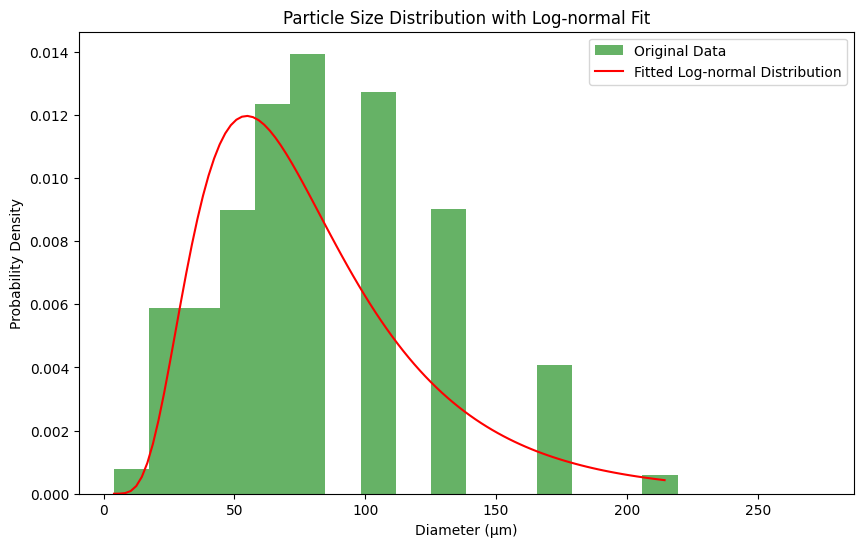

count    5.000000e+06
mean     8.328789e+01
std      4.735632e+01
min      3.572438e+00
25%      5.067104e+01
50%      7.238951e+01
75%      1.034636e+02
max      9.486554e+02
dtype: float64


In [40]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'S-FFC copy.xlsx'  # Replace with your actual file path
data = pd.read_excel(file_path)

# Splitting the 'diameter' column into individual lower and upper bounds
diameter_bounds = data['diameter'].str.split('-', expand=True).astype(float)

# Calculating the midpoints of the diameter intervals
midpoints = diameter_bounds.mean(axis=1)

# Expanding the dataset based on the weights to approximate the distribution
weights = data['diff_percent']
expanded_data = np.repeat(midpoints, (weights * 10000).astype(int))

# Fit the log-normal distribution to the expanded dataset
shape, loc, scale = lognorm.fit(expanded_data, floc=0)

# Plotting the fitted distribution
size_range = np.linspace(expanded_data.min(), expanded_data.max(), 100)
pdf_fitted = lognorm.pdf(size_range, shape, loc, scale)
plt.figure(figsize=(10, 6))
plt.hist(midpoints, bins=20, weights=weights, density=True, alpha=0.6, color='g', label='Original Data')
plt.plot(size_range, pdf_fitted, 'r-', label='Fitted Log-normal Distribution')
plt.title('Particle Size Distribution with Log-normal Fit')
plt.xlabel('Diameter (μm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Simulating 2 million particles using the fitted log-normal distribution
num_particles = 5000000
simulated_particles = lognorm.rvs(shape, loc, scale, size=num_particles)

# Basic statistics of the simulated particles
simulated_stats = pd.Series(simulated_particles).describe()

print(simulated_stats)


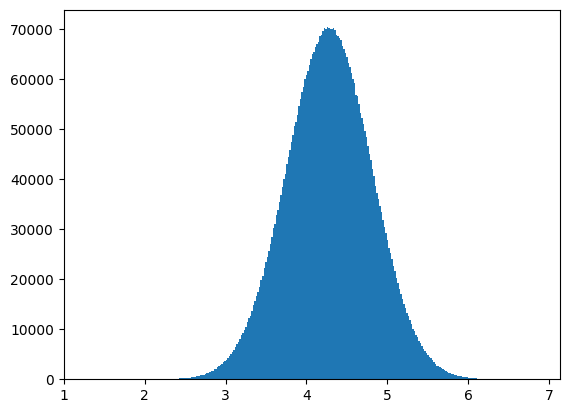

In [44]:
plt.hist(np.log(simulated_particles),bins=300)
plt.show()

In [295]:
# Generate the particles for each interval using the log-normal distribution
simulated_particles = np.concatenate([
    generate_log_normal_particles(row['lower_bound'], row['upper_bound'], row['diff_percent'], total_particles)
    for index, row in data.iterrows()
])



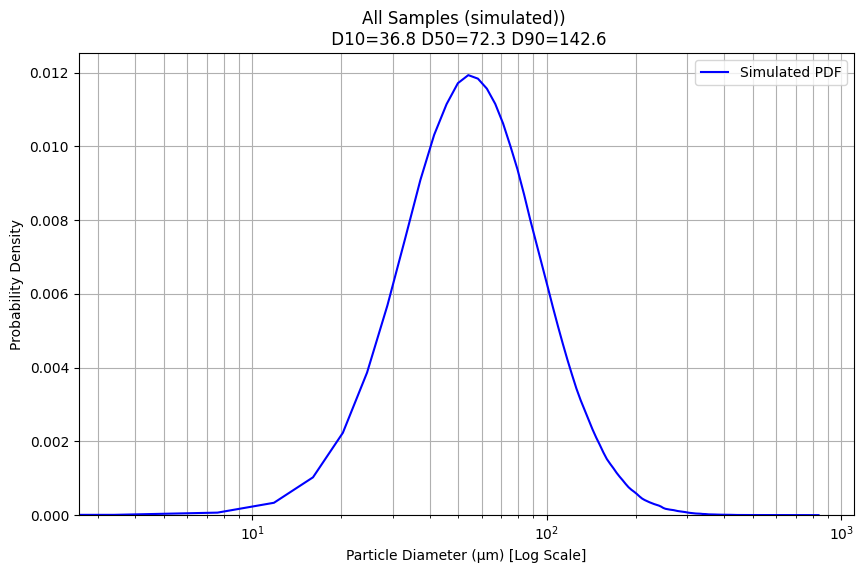

In [31]:
# Plotting the probability density function (PDF) for the simulated particles
plt.figure(figsize=(10, 6))
sns.kdeplot(simulated_particles, color='blue', label='Simulated PDF')
# plt.hist(simulated_particles)
plt.xscale('log')  # Logarithmic scale for the x-axis


D10 = np.percentile(simulated_particles,10)
D50 = np.percentile(simulated_particles,50)
D90 = np.percentile(simulated_particles,90)

plt.title('All Samples (simulated)) \n D10={:.1f} D50={:.1f} D90={:.1f}'.format(D10,D50,D90))
plt.xlabel('Particle Diameter (µm) [Log Scale]')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()


In [ ]:
# Plotting the probability density function (PDF) for the simulated particles
plt.figure(figsize=(10, 6))
sns.kdeplot(simulated_particles, color='blue', label='Simulated PDF')
# plt.hist(simulated_particles)
plt.gca().set_xscale('log')


D10 = np.percentile(simulated_particles,10)
D50 = np.percentile(simulated_particles,50)
D90 = np.percentile(simulated_particles,90)

plt.title('All Samples (simulated)) \n D10={:.1f} D50={:.1f} D90={:.1f}'.format(D10,D50,D90))
plt.xlabel('Particle Diameter (µm)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()


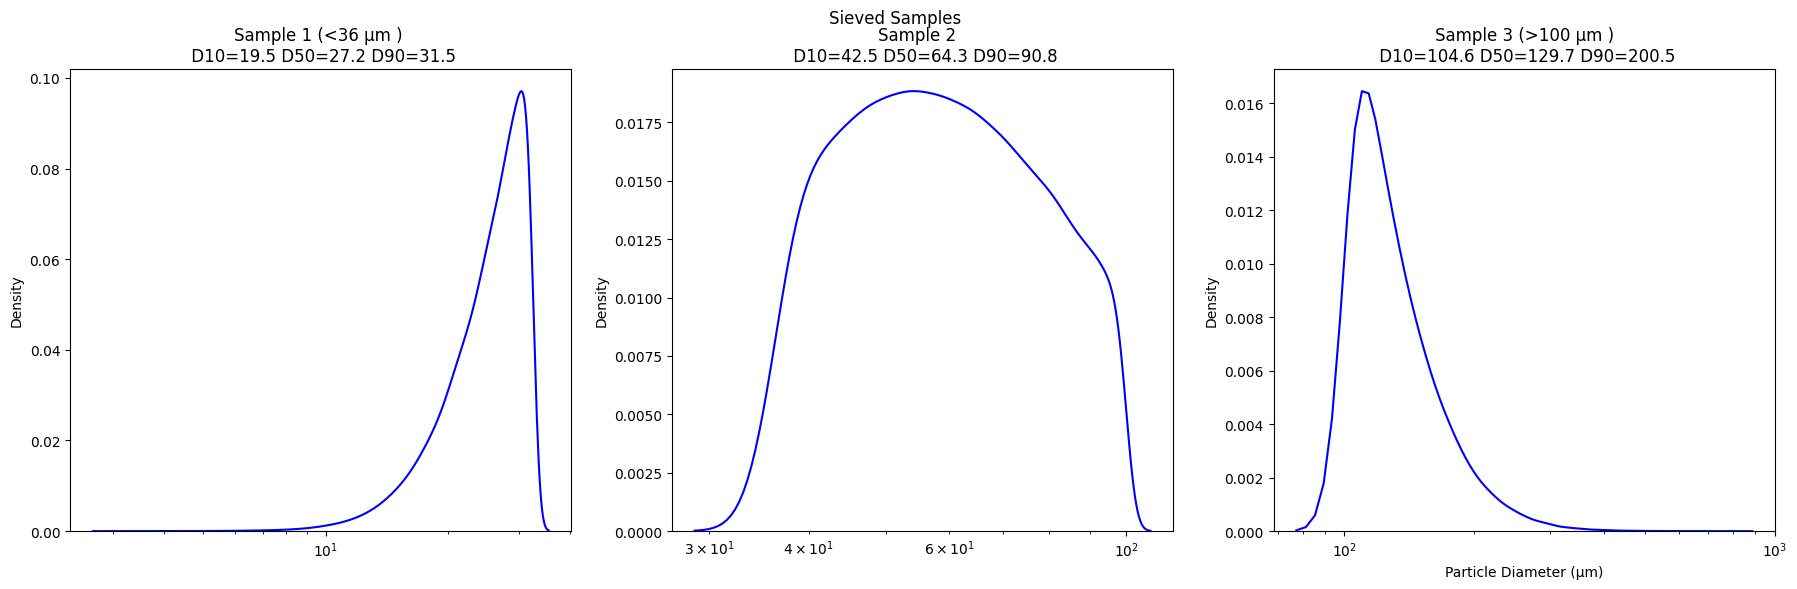

In [19]:

T1 = 36
T2 = 100
sample1 = simulated_particles[simulated_particles<(T1-T1*0.1) ]
sample2 = simulated_particles[(simulated_particles>T1) & (simulated_particles<T2)]
sample3 = simulated_particles[ simulated_particles>T2]



fig, axs = plt.subplots(1, 3, figsize=(22, 6))  # 3 rows, 1 column
plt.suptitle('Sieved Samples')

# Plotting the probability density function (PDF) for the simulated particles
sns.kdeplot(sample1, color='blue', label='Simulated PDF',ax=axs[0],bw_adjust=2)
D10 = np.percentile(sample1,10)
D50 = np.percentile(sample1,50)
D90 = np.percentile(sample1,90)
axs[0].set_title('Sample 1 (<{} µm ) \n D10={:.1f} D50={:.1f} D90={:.1f}'.format(T1,D10,D50,D90))
plt.xlabel('Particle Diameter (µm) [Log Scale]')
axs[0].set_xscale('log')


sns.kdeplot(sample2, color='blue', label='Simulated PDF',ax=axs[1],bw_adjust=2)
D10 = np.percentile(sample2,10)
D50 = np.percentile(sample2,50)
D90 = np.percentile(sample2,90)
axs[1].set_title('Sample 2  \n D10={:.1f} D50={:.1f} D90={:.1f}'.format(D10,D50,D90))
plt.xlabel('Particle Diameter (µm) [Log Scale]')
axs[1].set_xscale('log')



sns.kdeplot(sample3, color='blue', label='Simulated PDF',ax=axs[2],bw_adjust=2)
D10 = np.percentile(sample3,10)
D50 = np.percentile(sample3,50)
D90 = np.percentile(sample3,90)
axs[2].set_title('Sample 3 (>{} µm )\n D10={:.1f} D50={:.1f} D90={:.1f}'.format(T2,D10,D50,D90))
plt.xlabel('Particle Diameter (µm)')
axs[2].set_xscale('log')





plt.show()


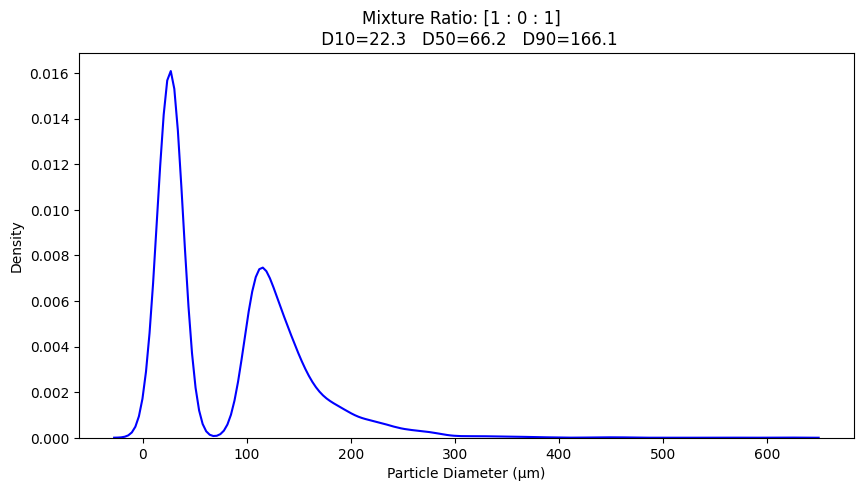

In [46]:
r1,r2,r3 = 1,0,1
m1 = np.random.choice(sample1,int(2000*r1))
m2 = np.random.choice(sample2,int(2000*r2))
m3 = np.random.choice(sample3,int(2000*r3))

mix = np.append(np.append(m1,m2),m3)

sns.kdeplot(mix, color='blue', label='Simulated PDF',bw_adjust=0.9)
D10 = np.percentile(mix,10)
D50 = np.percentile(mix,50)
D90 = np.percentile(mix,90)
plt.title('Mixture Ratio: [{} : {} : {}]  \n D10={:.1f}   D50={:.1f}   D90={:.1f}'.format(r1,r2,r3,D10,D50,D90))
plt.xlabel('Particle Diameter (µm)')

plt.gcf().set_size_inches(10,5)


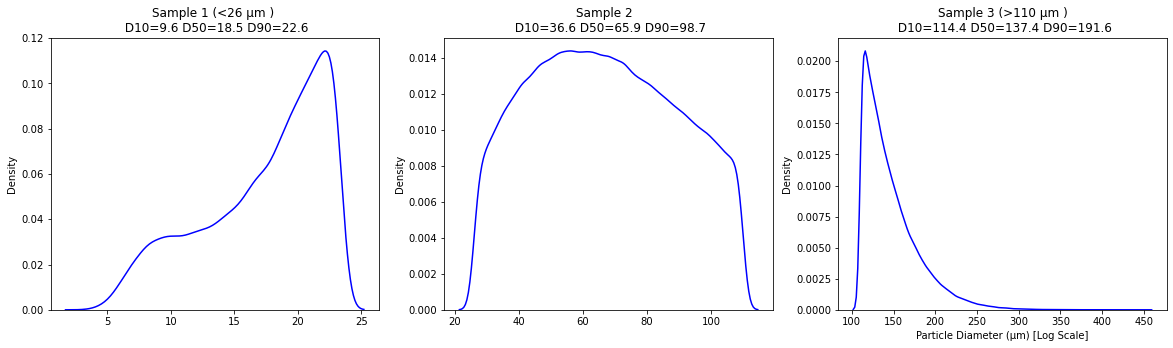

In [183]:

T1 = 26
T2 = 110
sample1 = simulated_particles[simulated_particles<(T1-T1*0.1) ]
sample2 = simulated_particles[(simulated_particles>T1) & (simulated_particles<T2)]
sample3 = simulated_particles[ simulated_particles>T2]



fig, axs = plt.subplots(1, 3, figsize=(20, 5))  # 3 rows, 1 column


# Plotting the probability density function (PDF) for the simulated particles
sns.kdeplot(sample1, color='blue', label='Simulated PDF',ax=axs[0])
D10 = np.percentile(sample1,10)
D50 = np.percentile(sample1,50)
D90 = np.percentile(sample1,90)
axs[0].set_title('Sample 1 (<{} µm ) \n D10={:.1f} D50={:.1f} D90={:.1f}'.format(T1,D10,D50,D90))
plt.xlabel('Particle Diameter (µm) [Log Scale]')



sns.kdeplot(sample2, color='blue', label='Simulated PDF',ax=axs[1])
D10 = np.percentile(sample2,10)
D50 = np.percentile(sample2,50)
D90 = np.percentile(sample2,90)
axs[1].set_title('Sample 2  \n D10={:.1f} D50={:.1f} D90={:.1f}'.format(D10,D50,D90))
plt.xlabel('Particle Diameter (µm) [Log Scale]')




sns.kdeplot(sample3, color='blue', label='Simulated PDF',ax=axs[2])
D10 = np.percentile(sample3,10)
D50 = np.percentile(sample3,50)
D90 = np.percentile(sample3,90)
axs[2].set_title('Sample 3 (>{} µm )\n D10={:.1f} D50={:.1f} D90={:.1f}'.format(T2,D10,D50,D90))
plt.xlabel('Particle Diameter (µm) [Log Scale]')



plt.show()


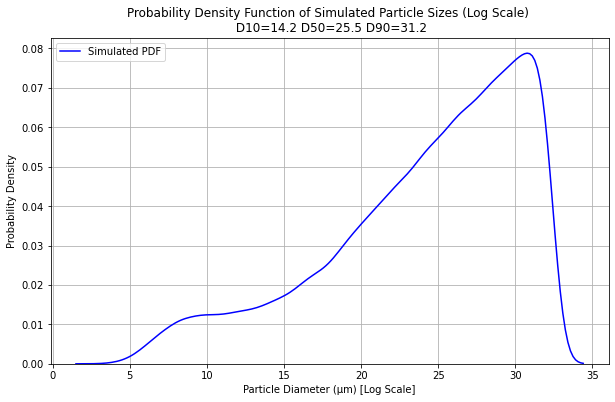

In [149]:
# Plotting the probability density function (PDF) for the simulated particles
plt.figure(figsize=(10, 6))
sns.kdeplot(sample1, color='blue', label='Simulated PDF')

# plt.hist(simulated_particles)
#plt.xscale('log')  # Logarithmic scale for the x-axis

D10 = np.percentile(sample1,10)
D50 = np.percentile(sample1,50)
D90 = np.percentile(sample1,90)
plt.title('Probability Density Function of Simulated Particle Sizes (Log Scale) \n D10={:.1f} D50={:.1f} D90={:.1f}'.format(D10,D50,D90))
plt.xlabel('Particle Diameter (µm) [Log Scale]')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()


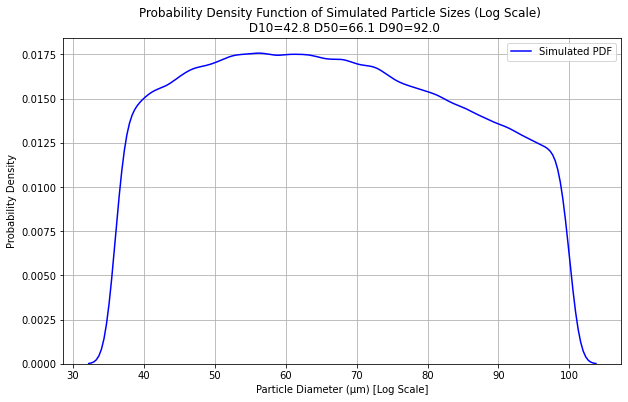

In [154]:
# Plotting the probability density function (PDF) for the simulated particles
plt.figure(figsize=(10, 6))
sns.kdeplot(sample2, color='blue', label='Simulated PDF')

# plt.hist(simulated_particles)
#plt.xscale('log')  # Logarithmic scale for the x-axis

D10 = np.percentile(sample2,10)
D50 = np.percentile(sample2,50)
D90 = np.percentile(sample2,90)
plt.title('Probability Density Function of Simulated Particle Sizes (Log Scale) \n D10={:.1f} D50={:.1f} D90={:.1f}'.format(D10,D50,D90))
plt.xlabel('Particle Diameter (µm) [Log Scale]')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()


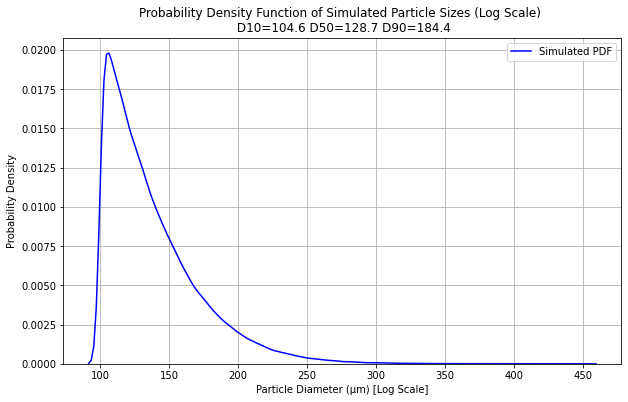

In [153]:
# Plotting the probability density function (PDF) for the simulated particles
plt.figure(figsize=(10, 6))
sns.kdeplot(sample3, color='blue', label='Simulated PDF')

# plt.hist(simulated_particles)
#plt.xscale('log')  # Logarithmic scale for the x-axis

D10 = np.percentile(sample3,10)
D50 = np.percentile(sample3,50)
D90 = np.percentile(sample3,90)
plt.title('Probability Density Function of Simulated Particle Sizes (Log Scale) \n D10={:.1f} D50={:.1f} D90={:.1f}'.format(D10,D50,D90))
plt.xlabel('Particle Diameter (µm) [Log Scale]')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()
